In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
from scipy.optimize import curve_fit
from scipy import special
import glob
import os
plt.style.use(['science','notebook','grid'])
import matplotlib.ticker as ticker

In [2]:
#Lecture du spèctre de lumière blanche
lum = pd.read_csv("1re séance\sans_echantillon_lum_fermer.txt",delimiter = '\t',skiprows=17,names = ['x','y'],decimal=',')
lum['x'] = lum['x'].apply(lambda x: x.replace(',','.'))
lum.drop(3648,inplace=True)
lum['y'] = lum['y'] / 350 #temps d'intégration
lum['x'] = lum['x'].apply(lambda x: float(x))

Text(0, 0.5, 'I')

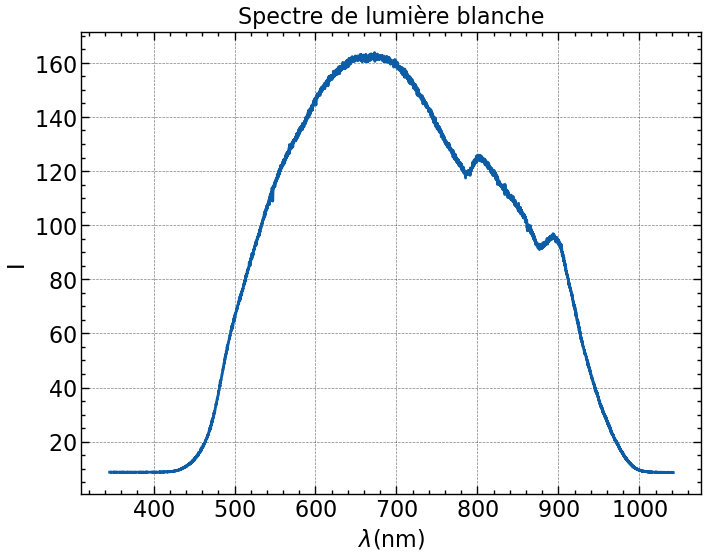

In [3]:
plt.plot(lum['x'],lum['y'])
plt.title('Spectre de lumière blanche')
plt.xlabel('$\lambda$(nm)')
plt.ylabel('I')

In [4]:
#Lecture du spèctre de Gase
Ga = pd.read_csv("1re séance\Gase.txt",delimiter = '\t',skiprows=17,names = ['x','y'],decimal=',')
Ga['x'] = Ga['x'].apply(lambda x: x.replace(',','.'))
Ga.drop(3648,inplace=True)
Ga['y'] = Ga['y'] / 1330 #temps d'intégration
Ga['x'] = Ga['x'].apply(lambda x: float(x))

Text(0, 0.5, 'I')

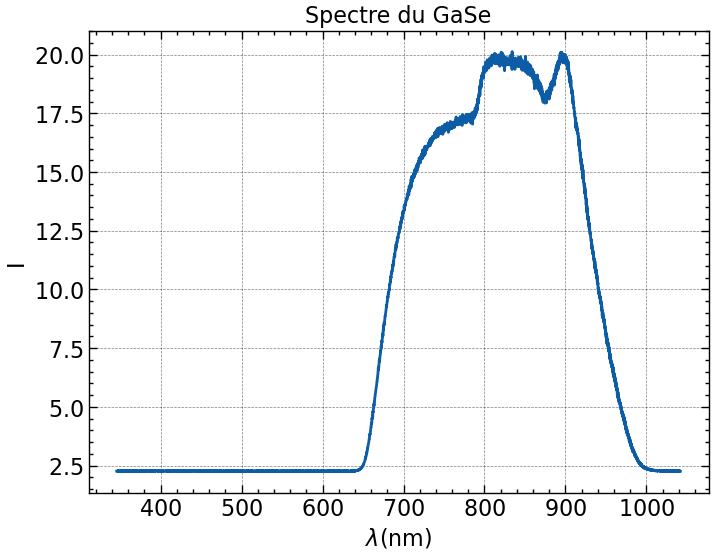

In [5]:
plt.plot(Ga['x'],Ga['y'])
plt.title('Spectre du GaSe')
plt.xlabel('$\lambda$(nm)')
plt.ylabel('I')
#plt.xlim([620,790])

# Transmittance GaSe

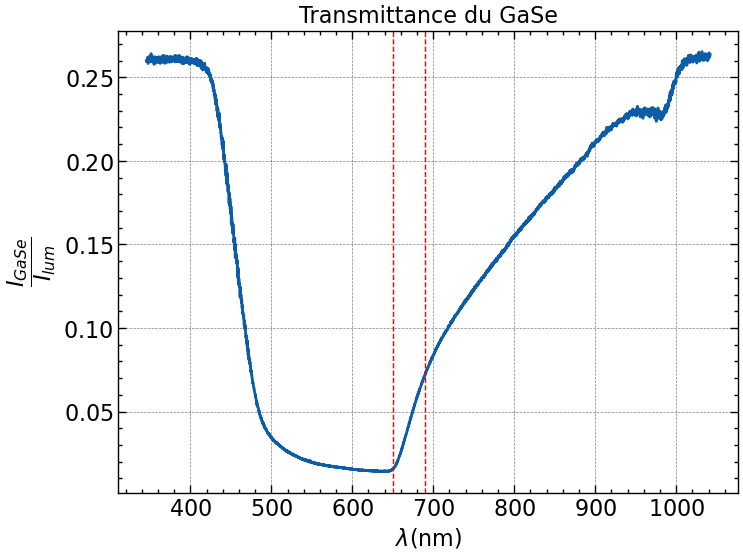

In [6]:
#On obtient la transmitance avec IGase/Ilum
Ga_T = pd.DataFrame(list(zip(Ga['x'],Ga['y']/lum['y'])),columns=['x','y'])
plt.plot(Ga_T['x'],Ga_T['y'])
plt.title('Transmittance du GaSe')
plt.xlabel('$\lambda$(nm)')
plt.ylabel('$\dfrac{I_{GaSe}}{I_{lum}}$')
plt.axvline(650,linewidth = 1,color='red',linestyle='--')
plt.axvline(690,linewidth = 1,color='red',linestyle='--')

On a deux parties linéaires :
- $\approx$ 655-690 nm
- $\approx$ 690-900 nm

In [7]:
#On défini des dataframes avec le début et lafin de nos relation linéaires
lin1 = Ga_T[(Ga_T['x'] > 655) & (Ga_T['x'] < 690)]
lin2 = Ga_T[(Ga_T['x'] > 690) & (Ga_T['x'] < 900)]
lin3 = Ga_T[(Ga_T['x'] > 550) & (Ga_T['x'] < 900)]

In [8]:
#Fonction Lin
def func(x, a, b):
    return a*x + b

#fit 1re droite linéaire
x = lin1['x']
y = lin1['y']
popt, pcov = curve_fit(func, x, y,p0 = [0.01,0])

#On récupère les valeurs de notre fonction affine 
a1 = popt[0] 
b1 = popt[1]

#On défini une nouvelle fonction avec les paramètres de notre fit pour le graphique
def lin_direct(x):
    return a1*x+b1

x_direct = np.linspace(620,720,1000)
y_direct = lin_direct(x_direct)


#fit 2e droite linéaire
x2 = lin2['x']
y2 = lin2['y']
popt2, pcov2 = curve_fit(func, x2, y2,p0 = [0.01,0]) 

a2 = popt2[0]
b2 = popt2[1]

#On défini une nouvelle fonction avec les paramètres de notre fit pour le graphique

def lin_indirect(x):
    return a2*x + b2

x_indirect = np.linspace(520,820,1000)
y_indirect = lin_indirect(x_indirect)

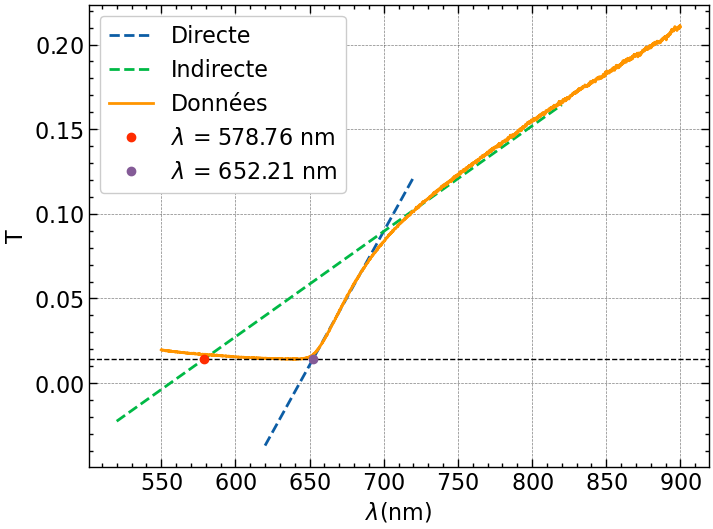

In [9]:
#Gap direct
plt.plot(x_direct,y_direct,'--',label='Directe')

#Gap indirect
plt.plot(x_indirect,y_indirect,'--',label='Indirecte')

#Données
plt.plot(lin3['x'],lin3['y'],label='Données')

plt.xlabel('$\lambda$(nm)')
plt.ylabel('T')
plt.axhline(min(lin3['y']),linewidth=1,linestyle = '--',color='black')

#Intersections
plt.plot(578.76,min(lin3['y']),'o',label = '$\lambda$ = 578.76 nm')
plt.plot(652.21,min(lin3['y']),'o',label = '$\lambda$ = 652.21 nm')


plt.legend()
plt.savefig('GaSe')

# Trouver les minimums d'énergie avec $\lambda$

On a maintenant trouver les équations y = ax+b pour nos deux gap, direct et indirect. On veut maintenant trouver la valeur de lambda lorsque les droites croisent la courbe de donnée

In [10]:
from sympy import symbols, solve
from sympy import *

On sait que notre première relation linéaire est : y = popt[0]*x + popt[1]

In [11]:
x, y = symbols('x y') 

y = popt[0] * x + popt[1]
y2 = popt2[0] * x + popt2[1]

# On résout pour nos deux équations pour la valeur minimale de transmittance
result = solve(Eq(y, min(lin3['y'])))
result2 = solve(Eq(y2, min(lin3['y'])))

print(result)
print(result2)

[652.219955241926]
[578.767521181206]


$E = \frac{hc}{\lambda}$

In [12]:
h = 6.62607015 *10**-34 #Constante de Planck
c = 299792458 #Vitesse de la lumière

#On trouve les valeurs d'énergie pour nos deux gaps
#On donne la réponse en eV
eV = 1.60218*10**-19

Edirect = (h*c/(result[0]*10**-9))/eV
Eindirect = (h*c/(result2[0]*10**-9))/eV




In [13]:
Eindirect

2.14220621266556

In [14]:
Edirect

1.90095284512344